In [1]:
%cd /Users/gwg/dmcm
%matplotlib inline

/Users/gwg/dmcm


In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Arial')
plt.rc('font', size=20)
import numpy as np
import torch
from   models import DPCCA
from   data import GTExV8Config

cfg = GTExV8Config()

In [39]:
def get_l1_norm_of_columns(l1_coef):
    directory = '/Users/gwg/dmcm/experiments/20190205_decaying_l1/'\
                'gtexv8_mode-dpcca_batch_size-128_seed-0_latent_dim-20_lr-0.0001_l1_coef-%s_em_iters-1_clip-1' % l1_coef
    model_path = directory + '/model.pt'
    state = torch.load(model_path, map_location={'cuda:0': 'cpu'})
    model = DPCCA(cfg, latent_dim=20)
    model.load_state_dict(state)

    with torch.no_grad():
        l1_norms = []
        for param in model.pcca.parameters_('y2'):
            for col in param.t():
                l1_norms.append(torch.norm(col, 1).item())
    
    return l1_norms

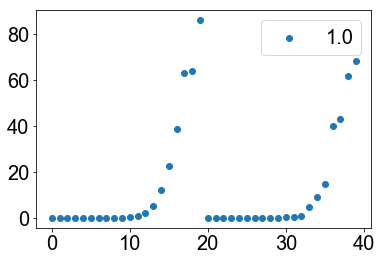

In [43]:
xs  = [1.0]#[0.5, 1.0, 1.5]
ys1 = []
ys2 = []
ys3 = []

for x in xs:
    l1_norms = get_l1_norm_of_columns(x)
    plt.scatter(list(range(len(l1_norms))), l1_norms, label=x)
# plt.ylim(-0.0025, 0.005)
plt.legend()